# Constrained linear regression using Tensorflow

In this post, we will perform a constrained linear regression using Tensorflow. In linear regression, we create a model of the form $Y = W.X + b$. In this post, we will constrain $W$ and $b$ to be non-negative quantities. Such constraints are often useful in different applications. Say, if we want to model household total energy as the air conditioner energy plus some additive noise, then the contribution of both these quantities should be non-negative in nature.

We would be using gradient descent for our regression problem. We calculate the gradients wrt W and b, as usual:
$$
\begin{eqnarray}
\delta W = \frac{\delta cost}{\delta W} \\
\delta b = \frac{\delta cost}{\delta b} \\
\end{eqnarray}
$$

The gist of our approach is that instead of updating as:
$$ \begin{eqnarray}
W = W - \delta W \times learning rate\\
b = b - \delta b \times learning rate\\
\end{eqnarray}
$$

we update as:

$$
\begin{eqnarray}
W = max(0, W - \delta W \times learning rate)\\
b = max(0, b - \delta b \times learning rate)\\
\end{eqnarray}
$$





### Customary imports

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Creating sample data

In [3]:
np.random.seed(0)
n_samples = 50
train_X = np.linspace(1, 50, n_samples)
train_Y = 10*train_X + 6 +40*np.random.randn(50)
train_Y = train_Y.reshape(n_samples, 1)
train_X = train_X.reshape(n_samples, 1)

In [4]:
%matplotlib inline

### Plotting sample data

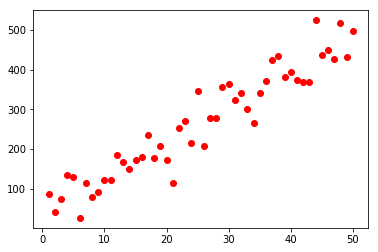

In [5]:
plt.plot(train_X, train_Y, 'ro')

### Solution

#### Creating regression model

In [31]:
# Model linear regression y = Wx + b. x is of shape `num_samples, 1`
x = tf.placeholder(tf.float32, [None, 1])

#
np.random.seed(0)
# Here we initialize W and b to be negative just to illustrate our point!
W = tf.Variable(1*tf.ones([1, 1]))
b = tf.Variable(1*tf.ones([1]))

product = tf.matmul(x,W)
y = product + b

#### Projected gradient, clipping!

In [32]:
# Clipping operation. 
clip_W = W.assign(tf.maximum(0., W))
clip_b = b.assign(tf.maximum(0., b))
clip = tf.group(clip_W, clip_b)

#### Defining the cost

In [33]:
y_ = tf.placeholder(tf.float32, [None, 1])

# Cost function 
cost = tf.reduce_sum(tf.pow(y-y_, 2))/(2*n_samples)

#### Defining params for gradient descent and initializing

In [35]:
lr = 1e+2
steps = 100
# Training using Gradient Descent to minimize cost
train_step = tf.train.AdagradOptimizer(lr).minimize(cost)

init = tf.global_variables_initializer()

#### TensorFlow session

In [36]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        print("*"*40)
        print("Iteration Number %d" %i)
        print("*"*40)
        print("\nBefore gradient computation")
        print("-"*40)
    
        print("W: %f" % sess.run(W))
        print("b: %f" % sess.run(b))
        feed = { x: train_X, y_: train_Y }
        sess.run(train_step, feed_dict=feed)
        print("\nAfter gradient computation")
        print("-"*40)
        print("W: %f" % sess.run(W))
        print("b: %f" % sess.run(b))
        print("\nAfter gradient projection")
        print("-"*40)
        # THIS line would ensure the projection step happens!
        sess.run(clip)
        print("W: %f" % sess.run(W))
        print("b: %f" % sess.run(b))
        print("\nCost: %f" % sess.run(cost, feed_dict=feed))
        print("*"*40)
    learnt_W = sess.run(W)
    learnt_b = sess.run(b)

****************************************
Iteration Number 0
****************************************

Before gradient computation
----------------------------------------
W: 1.000000
b: 1.000000

After gradient computation
----------------------------------------
W: 101.000000
b: 100.999916

After gradient projection
----------------------------------------
W: 101.000000
b: 100.999916

Cost: 3788865.500000
****************************************
****************************************
Iteration Number 1
****************************************

Before gradient computation
----------------------------------------
W: 101.000000
b: 100.999916

After gradient computation
----------------------------------------
W: 1.459496
b: 1.492668

After gradient projection
----------------------------------------
W: 1.459496
b: 1.492668

Cost: 32530.898438
****************************************
****************************************
Iteration Number 2
****************************************

Be

----------------------------------------
W: 9.450761
b: 20.888908

After gradient projection
----------------------------------------
W: 9.450761
b: 20.888908

Cost: 924.277405
****************************************
****************************************
Iteration Number 47
****************************************

Before gradient computation
----------------------------------------
W: 9.450761
b: 20.888908

After gradient computation
----------------------------------------
W: 9.444921
b: 21.083702

After gradient projection
----------------------------------------
W: 9.444921
b: 21.083702

Cost: 923.331116
****************************************
****************************************
Iteration Number 48
****************************************

Before gradient computation
----------------------------------------
W: 9.444921
b: 21.083702

After gradient computation
----------------------------------------
W: 9.439137
b: 21.276609

After gradient projection
---------------------

b: 27.766850

After gradient projection
----------------------------------------
W: 9.244574
b: 27.766850

Cost: 896.441956
****************************************
****************************************
Iteration Number 90
****************************************

Before gradient computation
----------------------------------------
W: 9.244574
b: 27.766850

After gradient computation
----------------------------------------
W: 9.240730
b: 27.895041

After gradient projection
----------------------------------------
W: 9.240730
b: 27.895041

Cost: 896.032166
****************************************
****************************************
Iteration Number 91
****************************************

Before gradient computation
----------------------------------------
W: 9.240730
b: 27.895041

After gradient computation
----------------------------------------
W: 9.236924
b: 28.021992

After gradient projection
----------------------------------------
W: 9.236924
b: 28.021992

Cost: 8

As we can see from the output, the clipping operation ensures that W and b remain non-negative.

### Plotting the results

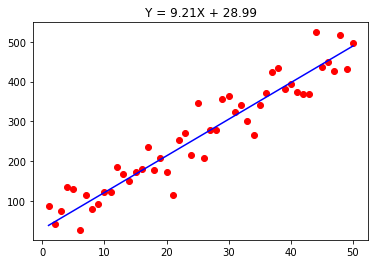

In [37]:
plt.plot(train_X, train_Y, 'ro')
pred_Y = np.multiply(train_X, learnt_W)+learnt_b
plt.plot(train_X, pred_Y, 'b')
plt.title("Y = {:0.2f}X + {:0.2f}".format(learnt_W[0, 0], learnt_b[0]))

### References

1. http://stackoverflow.com/questions/43065931/tensorflow-linear-regression-with-non-negative-constraints/43171577?noredirect=1#comment73442194_43171577
2. https://github.com/aymericdamien/TensorFlow-Examples
3. https://aqibsaeed.github.io/2016-07-07-TensorflowLR/
4. https://medium.com/all-of-us-are-belong-to-machines/the-gentlest-introduction-to-tensorflow-248dc871a224